## Assessing the performance of our convolutional neural network model

In this notebook, we first look at more performance comparisons between the training and validation sets.  We then run our model on our test set (reserved and separated from the training data) and look at performance metrics.

In [1]:
import sys
sys.path.append('../src/')
from evaluate_model import *
%matplotlib inline
import matplotlib.pyplot as plt

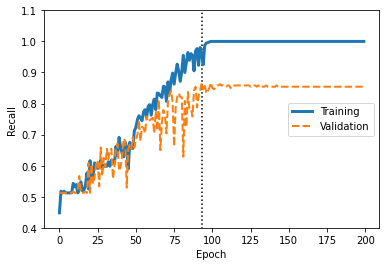

In [3]:
# First plot is epoch vs recall as can be run from `evaluate_model.py'
with open('../models/training.model.history', 'rb') as f:
    history = pickle.load(f)

plot_performance(history)

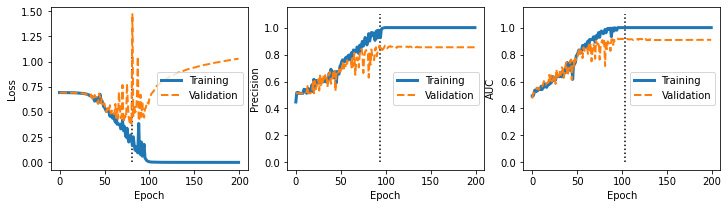

In [4]:
# We can also look at loss, precision, AUC
# Black dashed line at min for loss, max for the others
plt.rcParams["figure.figsize"] = (12, 3) # (w, h)

plt.subplot(131)
plt.plot(history['loss'], lw=3, label='Training')
plt.plot(history['val_loss'], '--', lw=2, label='Validation')
y1 = np.asarray(history['val_loss'])
plt.vlines(y1.argmin(), 0, 1.1, color='k', ls=':')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=5)

plt.subplot(132)
plt.plot(history['precision'], lw=3, label='Training')
plt.plot(history['val_precision'], '--', lw=2, label='Validation')
y1 = np.asarray(history['val_precision'])
plt.vlines(y1.argmax(), 0, 1.1, color='k', ls=':')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc=5)

plt.subplot(133)
plt.plot(history['auc'], lw=3, label='Training')
plt.plot(history['val_auc'], '--', lw=2, label='Validation')
y1 = np.asarray(history['val_auc'])
plt.vlines(y1.argmax(), 0, 1.1, color='k', ls=':')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(loc=5)

In [6]:
# Load the model and predict on X_test
model =  load_model()
(X_test, y_test) = load_test_data()
predict = model.predict(X_test)
y_predicted = predict.argmax(axis=1)

# Evaluate loss, recall, precision, AUC
evaluate = model.evaluate(X_test, y_test)
print('Loss {}'.format(evaluate[0]))
print('Recall {}'.format(evaluate[1]))
print('Precision {}'.format(evaluate[2]))
print('AUC {}'.format(evaluate[3]))

7/7 [==============================] - 1s 40ms/step - loss: 1.2842 - recall: 0.6650 - precision: 0.6650 - auc: 0.7301
Loss 1.2841929197311401
Recall 0.6650000214576721
Precision 0.6650000214576721
AUC 0.7300875186920166
